# Incendios Florestais no Brasil
##### Esse conjunto de dados contem o numero de incendios florestais no Brasil por estados. Contem um periodo de aproximadamente 10 anos (1998 até 2017). Dados obtidos do site oficial do governo Brasileiro.
##### Conjunto de dados obtido em: https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

# Problemas de negocio:
* Qual estado tem o maior número de queimadas em um determinado período?
* Como as queimadas mudaram ao longo dos anos em diferentes regiões?
* Quais meses apresentam o maior número de queimadas?
* Há correlação entre as queimadas e a localização geográfica (estados/regiões)?
* Tendência de crescimento das queimadas ao longo do tempo?

# Extra:
* Modelagem Preditiva: Se houver interesse em prever o número de queimadas para os próximos anos, você pode explorar técnicas de machine learning, como modelos de regressão linear, árvores de decisão, ou redes neurais.
* Storytelling: Explorar ferramentas como Dash ou Plotly para criar visualizações interativas e contar uma história envolvente com os dados.

# 1 - Carregamento, Inspeção e Limpeza dos Dados:

#### 1.1 - Importação das bibliotecas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.2 - Carregando e visualizando os dados

In [15]:
df = pd.read_csv("amazon.csv", encoding="latin_1")

In [16]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [17]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [18]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

##### 1.3 - Verificando valores ausentes

In [19]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [20]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

#### 1.4 - Informações gerais

In [21]:
# As unicas colunas numericas são o ano e o numero de queimadas. 
# Como não faz sentido analizar isso para o ano, fitro apenas para o numero de queimadas
df['number'].describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

In [22]:
# Quais estados foram contemplados nesse conjunto de dados
df['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

# 2 - Analise Exploratoria dos Dados (EDA)

##### 2.1 - Total de Queimadas

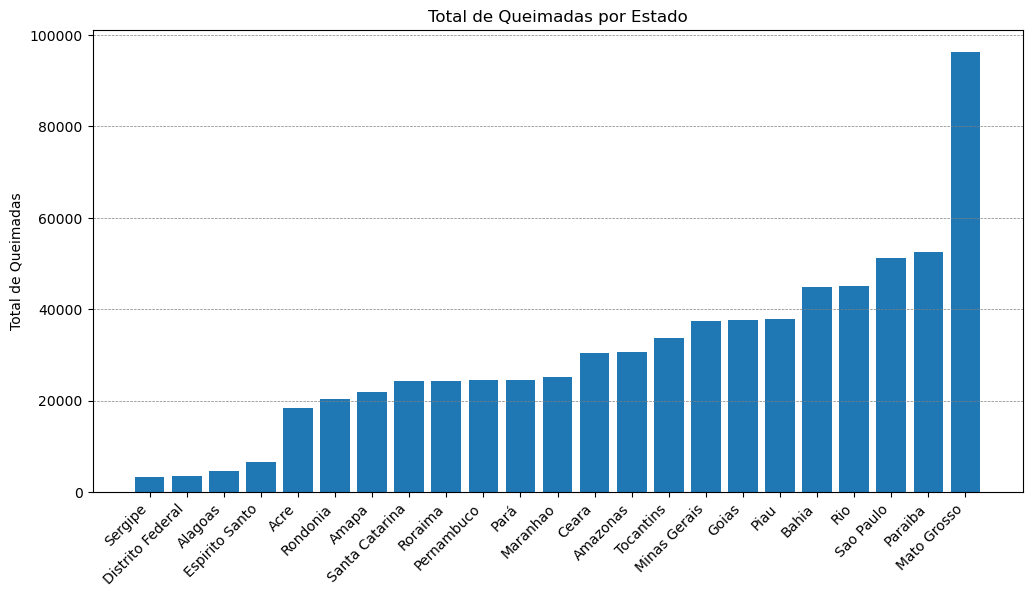

In [23]:
# Total de queimadas por estado
total_queimadas_por_estado = df.groupby('state')['number'].sum().sort_values()

# Separando os labels (estados) e valores (total de queimadas)
estados = total_queimadas_por_estado.index
total_queimadas = total_queimadas_por_estado.values

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(estados, total_queimadas, color='tab:blue')

# Rotacionando os rótulos dos estados no eixo X para facilitar a leitura
plt.xticks(rotation=45, ha='right')

# Adicionando grid ao gráfico
ax.grid(axis="y", color='gray', linestyle='--', linewidth=0.5)

# Adicionando rótulos e título
ax.set_ylabel('Total de Queimadas')
ax.set_title('Total de Queimadas por Estado')

# Exibindo o gráfico
plt.show()